In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df= pd.read_csv('heart.csv')
df.columns=['age','sex','chest_pain_type','resting_bps','cholestrol','fbs','resting_ecg','max_heart_rate','exercise_angina','oldpeak','st_slope','target']
df_backup = df.copy()

# Attribute Information:

- age : age in years 
- sex : 1 = male, 0 = female 
- chest_pain_type : 0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic
- resting_bps : resting blood pressure in mmHg
- cholestrol : serum cholestrol in mg/dl ( normal is 200 mg/dl)
- fbs : ( fasting_blood_sugar > 120 mg/dl ?) 
        1 = yes, 0 = no
- resting_ecg : 0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable/definite left ventricular hypertrophy by Estes's criteria
- max_heart_rate : maximum heart rate achieved
- exercise_angina : (exercise induced angina ?)
        1 = Yes, 0 = No
- oldpeak : ST depression induced by exercise relative to rest
- slope : the slope of the peak exercise ST segment
        0 = upsloping, 1 = flat, 2 = downsloping
- target : 1 = affected by heart disease, 0 = not affected by heart disease


In [3]:
df.head()

,age,sex,chest_pain_type,resting_bps,cholestrol,fbs,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


# Exploratory Data Analysis

# <u> Objectives : </u> 
- To predict whether the person is suffering from heart disease or not.

In [4]:
df.shape

(1190, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1190 non-null   int64  
 1   sex              1190 non-null   int64  
 2   chest_pain_type  1190 non-null   int64  
 3   resting_bps      1190 non-null   int64  
 4   cholestrol       1190 non-null   int64  
 5   fbs              1190 non-null   int64  
 6   resting_ecg      1190 non-null   int64  
 7   max_heart_rate   1190 non-null   int64  
 8   exercise_angina  1190 non-null   int64  
 9   oldpeak          1190 non-null   float64
 10  st_slope         1190 non-null   int64  
 11  target           1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


<u> Observations : </u>
- there are 11 features
- there is 1 target column
- 10 features are integer type and 1 feature is float type.

## Renaming data for readability in visualization

In [8]:
df['sex'][df['sex']==1]='male'
df['sex'][df['sex']==0]='female'

df['chest_pain_type'][df['chest_pain_type']==0]='typical_angina'
df['chest_pain_type'][df['chest_pain_type']==1]='atypical_angina'
df['chest_pain_type'][df['chest_pain_type']==2]='non_anginal_pain'
df['chest_pain_type'][df['chest_pain_type']==3]='asymptomatic'

df['resting_ecg'][df['resting_ecg']==0]='normal'
df['resting_ecg'][df['resting_ecg']==1]='abnormal'
df['resting_ecg'][df['resting_ecg']==2]='probable'

df['exercise_angina'][df['exercise_angina']==1]='yes'
df['exercise_angina'][df['exercise_angina']==0]='no'

df['st_slope'][df['st_slope']==0]='upsloping'
df['st_slope'][df['st_slope']==1]='flat'
df['st_slope'][df['st_slope']==2]='downsloping'

df['fbs'][df['fbs']==1]='yes'
df['fbs'][df['fbs']==0]='no'

df['target'][df['target']==1]='heart_disease'
df['target'][df['target']==0]='normal'


In [9]:
df.dtypes

age                  int64
sex                 object
chest_pain_type     object
resting_bps          int64
cholestrol           int64
fbs                 object
resting_ecg         object
max_heart_rate       int64
exercise_angina     object
oldpeak            float64
st_slope            object
target              object
dtype: object

# Grouping Features by Data Type

In [10]:
numerical_features = ['age','resting_bps','cholestrol','max_heart_rate','oldpeak']

categorical_features  = ['sex','chest_pain_type','fbs','resting_ecg','exercise_angina','st_slope']


# Exploring Features 

heart_disease    629
normal           561
Name: target, dtype: int64



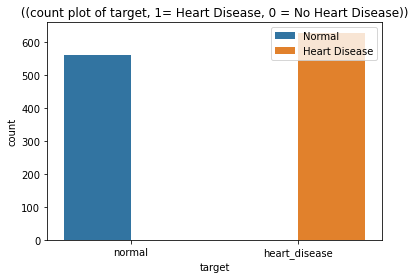

In [11]:
print(df['target'].value_counts())

sns.countplot(x='target', data = df,hue = 'target')
plt.title(' ((count plot of target, 1= Heart Disease, 0 = No Heart Disease)) ')
print('')
plt.legend(['Normal','Heart Disease'])
plt.show()

<u> Observation : </u>
- the number of heart disease affected patients(1) = 629 amd not affected(0) = 561 . So this is a somewhat balanced dataset

# Statistical Analysis :

In [12]:
print('')
print('Stats of person with Heart Disease')
df[df['target']=='heart_disease'].describe().T


Stats of person with Heart Disease


,count,mean,std,min,25%,50%,75%,max
age,629.0,56.034976,8.605215,31.0,51.0,57.0,62.0,77.0
resting_bps,629.0,134.259141,19.670323,0.0,120.0,132.0,145.0,200.0
cholestrol,629.0,191.372019,119.734612,0.0,126.0,226.0,274.0,603.0
max_heart_rate,629.0,129.777424,23.718521,60.0,113.0,128.0,147.0,195.0
oldpeak,629.0,1.331320,1.183346,-2.6,0.1,1.2,2.0,6.2


In [13]:
print('')
print("Stats of person who's health is Normal")
df[df['target']=='normal'].describe().T


Stats of person who's health is Normal


,count,mean,std,min,25%,50%,75%,max
age,561.0,51.124777,9.493914,28.0,44.0,51.0,57.0,76.0
resting_bps,561.0,129.793226,16.490474,80.0,120.0,130.0,140.0,190.0
cholestrol,561.0,231.657754,70.021658,0.0,201.0,232.0,268.0,564.0
max_heart_rate,561.0,150.894831,22.704971,69.0,137.0,154.0,169.0,202.0
oldpeak,561.0,0.464706,0.733243,-1.1,0.0,0.0,0.8,4.2


### Summary of statistics of numerical features
- age :
<ul> <li> average age of heart disease patient is more. </li>
</ul>
- resting blood pressure :
<ul> <li> average resting_bps of heart disease patient is more. </li>
</ul>
- cholestrol :
<ul> <li> average cholestrol of heart disease patient is less.(data may need cleaning) </li>
</ul>
- max heart rate :
<ul> <li> average max_heart_rate of heart disease patient is more. </li>
</ul>
- oldpeak :
<ul> <li> average oldpeak of heart disease patient is more. </li>
</ul>

# Bi-Variate Analysis

## Pair Plot of Numerical Features

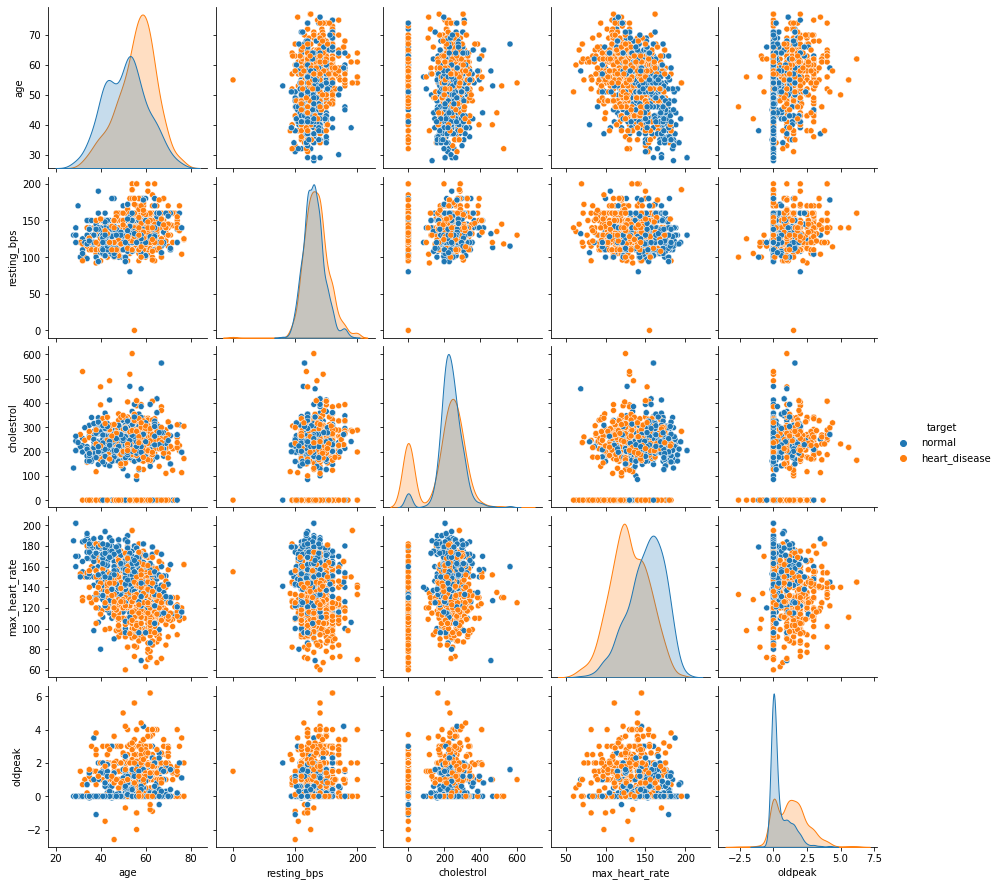

In [14]:
sns.pairplot(df,hue = 'target')
plt.show()


<u> Observations : </u>
- higher age leads to heart disease.
- lower max heart rate leads to heart disease.
- higher old peak leads to heart disease.
- but,from above pair plots we did not get any useful information.
- all data points are spread.


# Count plot of categorical features

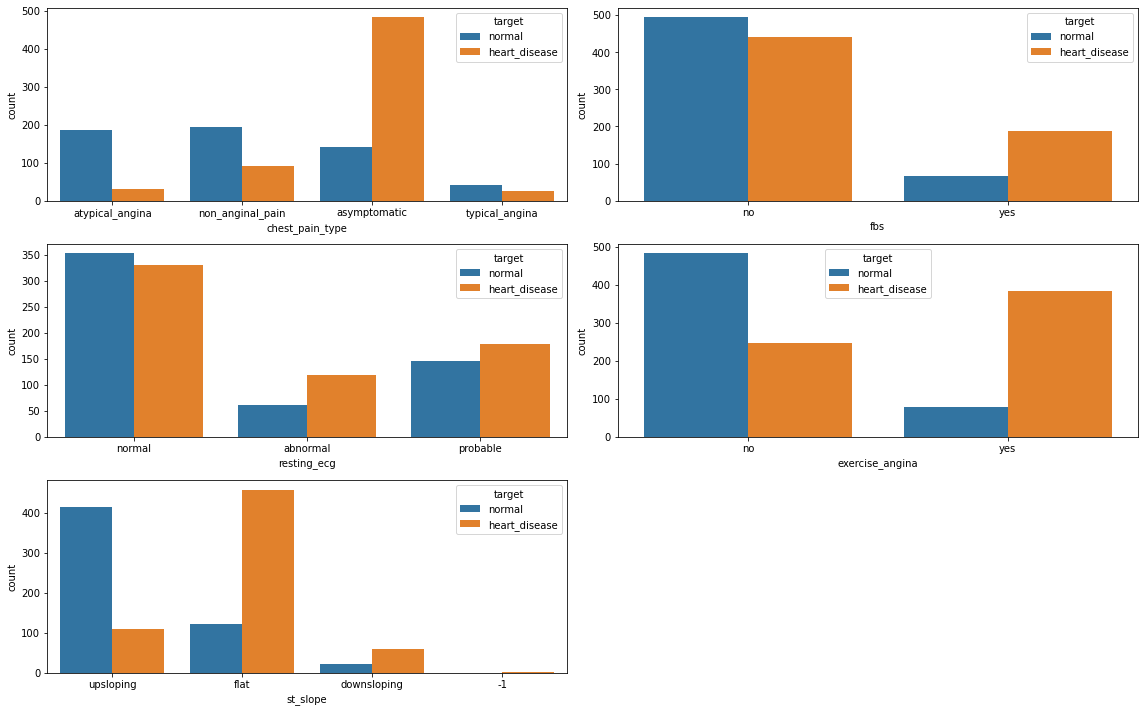

In [15]:
plt.figure(figsize = (16,10))
for i in range(1,6):
    plt.subplot(3,2,i)
    sns.countplot(df[categorical_features[i]],hue = df['target'])
plt.tight_layout()
plt.show()

<u> Observations : </u>
- Chest Pain Type: <ul><li>
    Patient with asymptomatic chest pain type are more likely to have heart disease.</li>
</ul>
- fasting blood sugar(fbs) <ul><li>
    Patient with fbs > 120mg/dl are more likely to have heart disease.</li>
</ul>
- resting ecg <ul>
    <li> Patient with ST-T wave abnormality and left-ventricular hypertropy are more likely to have heart disease.</li>
</ul>

- exercise angina <ul><li>
    Patients who induce exercise angina are likely to have heart disease.</li>
</ul>
- ST slope <ul><li>
    Pat.ient with downslope are more likely to have heart disease</li>
    <li>
    Patient with flat slope are not prone to heart disease.</li>
</ul>


# Checking Outliers

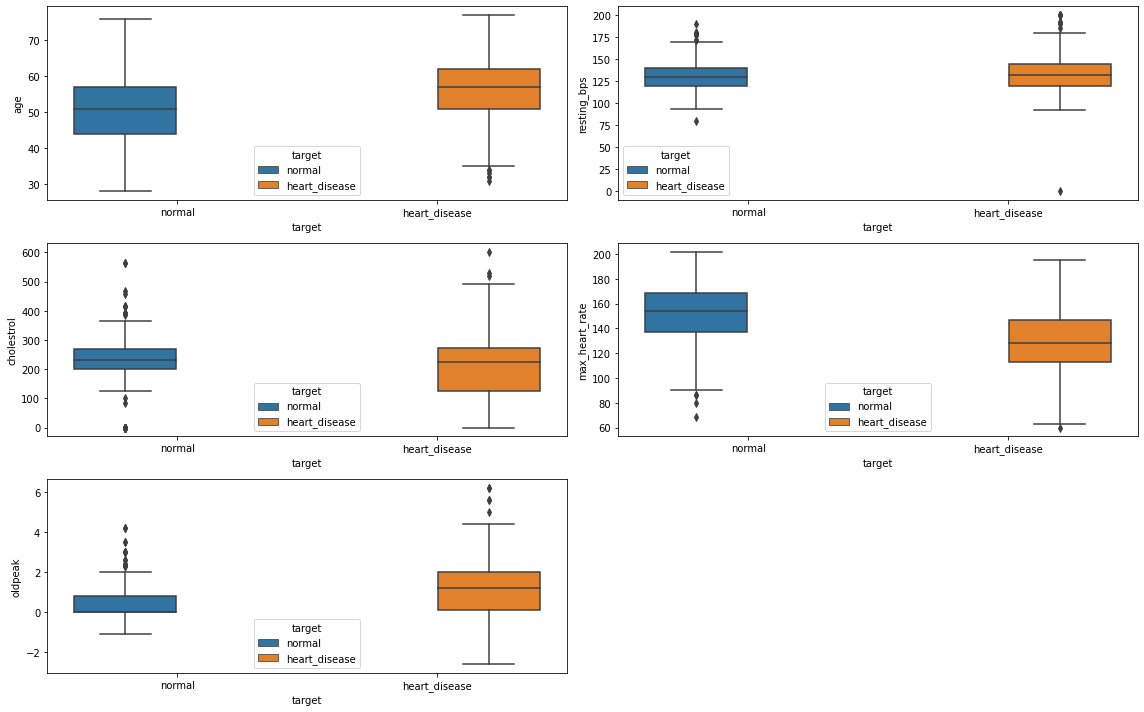

In [16]:
plt.figure(figsize = (16,10))
for i in range(5):
    plt.subplot(3,2,i+1)
    sns.boxplot(data =df,x= 'target',y =numerical_features[i],hue = 'target')

plt.tight_layout()
plt.show()


<u> Observations : </u>
- Outliers are present in cholestrol, resting_ecg, max_heart_rate, oldpeak

## Removing outliers directly

In [17]:
df.st_slope.value_counts()

flat           582
upsloping      526
downsloping     81
-1               1
Name: st_slope, dtype: int64

In [18]:
df=df[df['st_slope']!=-1]

In [19]:
# Removing oldpeak outliers: minimum value of oldpeak is 0
df = df[df['oldpeak']>=0]

# Removing cholestrol outliers : general minimum value of cholestrol is 50
df = df[df['cholestrol']>=50]

In [20]:
# Removing oldpeak outliers
df_backup = df_backup[df_backup['oldpeak']>=0]

# Removing cholestrol outliers for Normal Person
df_backup = df_backup[df_backup['cholestrol']>=50]

In [21]:
df.shape

(1016, 12)

## Removing outliers using Percentile

In [22]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

# Remove the outliers using IQR
df= df[~(( df['resting_bps'] < lower_limit['resting_bps']) | (df['resting_bps'] > upper_limit['resting_bps']))]
df= df[~(( df['cholestrol'] < lower_limit['cholestrol']) | (df['cholestrol'] > upper_limit['cholestrol']))]
df= df[~(( df['max_heart_rate'] < lower_limit['max_heart_rate']) | (df['max_heart_rate'] > upper_limit['max_heart_rate']))]


In [23]:
df_backup = df_backup[~(( df_backup['resting_bps'] < lower_limit['resting_bps']) | (df_backup['resting_bps'] > upper_limit['resting_bps']))]
df_backup = df_backup[~(( df_backup['cholestrol'] < lower_limit['cholestrol']) | (df_backup['cholestrol'] > upper_limit['cholestrol']))]
df_backup = df_backup[~(( df_backup['max_heart_rate'] < lower_limit['max_heart_rate']) | (df_backup['max_heart_rate'] > upper_limit['max_heart_rate']))]


In [24]:
df.shape

(960, 12)

# Data Preprocessing :

## Checking Null Values

In [25]:
df.isna().sum()

age                0
sex                0
chest_pain_type    0
resting_bps        0
cholestrol         0
fbs                0
resting_ecg        0
max_heart_rate     0
exercise_angina    0
oldpeak            0
st_slope           0
target             0
dtype: int64

<u> Observations: </u>
- No NULL values

# Visualization after cleaning data and removing outliers

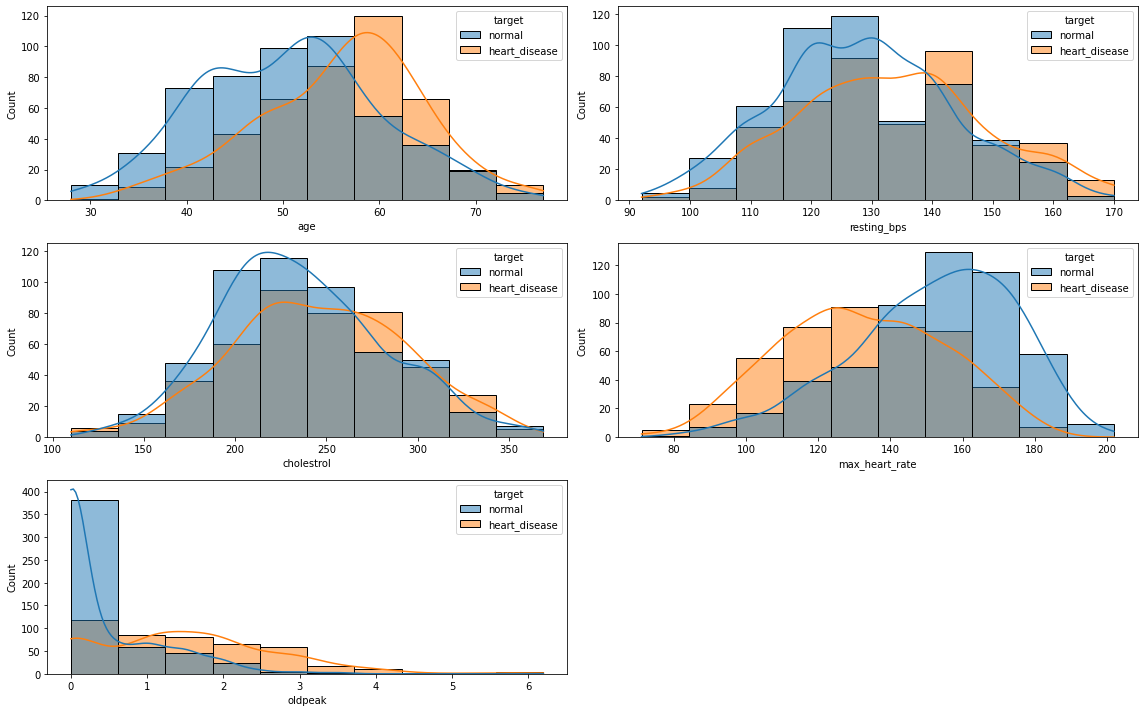

In [26]:
plt.figure(figsize = (16,10))
for i in range(len(numerical_features)):
    plt.subplot(3,2,i+1)
    sns.histplot(data = df,x=numerical_features[i],hue='target',kde=True,bins =10)
plt.tight_layout()
plt.show()
plt.show()

<u> Observation : </u>
- After cleaning data and removing outliers , the oldpeak values and cholestrol are proper.

# Standarization


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_backup)

In [28]:
scaled_df.shape

(961, 12)

In [29]:
df_corr= pd.DataFrame(scaled_df,columns=['age','sex','chest_pain_type','resting_bps','cholestrol','fbs','resting_ecg','max_heart_rate','exercise_angina','oldpeak','st_slope','target'])

# Correlation matrix

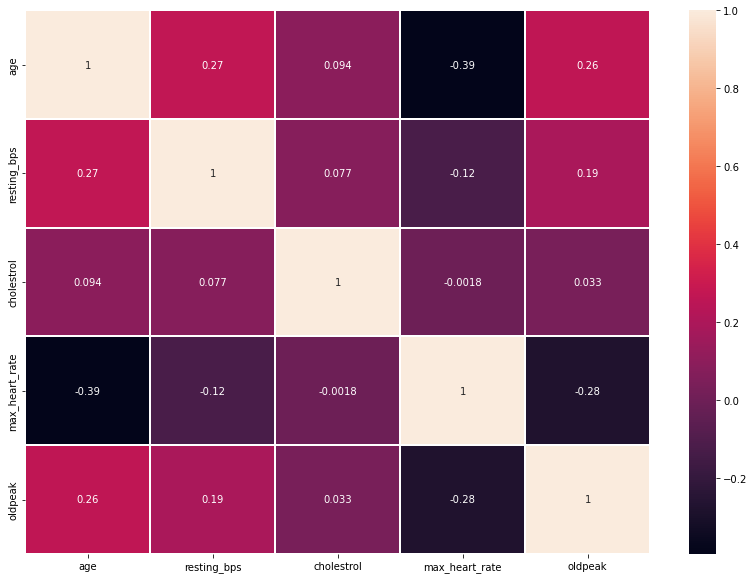

In [30]:
plt.figure(figsize = (14,10))
sns.heatmap(df_corr[numerical_features].corr(),annot = True,linewidths = 2)
plt.show()

<u> Observations : </u>
- Correlation between the numerical features is weak.

# One Hot Encoding

In [31]:
one_hot_data = pd.get_dummies((df.drop('target',axis =1)), drop_first=True)
one_hot_data.columns

Index(['age', 'resting_bps', 'cholestrol', 'max_heart_rate', 'oldpeak',
       'sex_male', 'chest_pain_type_atypical_angina',
       'chest_pain_type_non_anginal_pain', 'chest_pain_type_typical_angina',
       'fbs_yes', 'resting_ecg_normal', 'resting_ecg_probable',
       'exercise_angina_yes', 'st_slope_flat', 'st_slope_upsloping'],
      dtype='object')

In [32]:
one_hot_data.head()

,age,resting_bps,cholestrol,max_heart_rate,oldpeak,sex_male,chest_pain_type_atypical_angina,chest_pain_type_non_anginal_pain,chest_pain_type_typical_angina,fbs_yes,resting_ecg_normal,resting_ecg_probable,exercise_angina_yes,st_slope_flat,st_slope_upsloping
0,40,140,289,172,0.0,1,1,0,0,0,1,0,0,0,1
1,49,160,180,156,1.0,0,0,1,0,0,1,0,0,1,0
2,37,130,283,98,0.0,1,1,0,0,0,0,0,0,0,1
3,48,138,214,108,1.5,0,0,0,0,0,1,0,1,1,0
4,54,150,195,122,0.0,1,0,1,0,0,1,0,0,0,1


# Modelling

In [33]:
x = df_backup.drop('target',axis = 1)
y = df_backup['target']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [36]:
logistic_regression_model = LogisticRegression()
svc_model = SVC()
random_forest_model =RandomForestClassifier()
decision_tree_model =DecisionTreeClassifier()

# Cross validation scores

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
score_lr=cross_val_score(logistic_regression_model, df_corr.drop('target',axis=1), df_backup['target'],cv=5)
print(score_lr)
print("Avg :",np.average(score_lr))

[0.82901554 0.88020833 0.79166667 0.80729167 0.796875  ]
Avg : 0.8210114421416235


In [39]:
score_lr=cross_val_score(svc_model,df_corr.drop('target',axis=1), df_backup['target'],cv=5)
print(score_lr)
print("Avg :",np.average(score_lr))

[0.82901554 0.88541667 0.84375    0.83854167 0.83333333]
Avg : 0.8460114421416234


In [40]:
score_lr=cross_val_score(random_forest_model,df_corr.drop('target',axis=1), df_backup['target'],cv=5)
print(score_lr)
print("Avg :",np.average(score_lr))

[0.84455959 0.92708333 0.99479167 0.88541667 0.96354167]
Avg : 0.9230785837651123


In [41]:
score_lr=cross_val_score(decision_tree_model,df_corr.drop('target',axis=1), df_backup['target'],cv=5)
print(score_lr)
print("Avg :",np.average(score_lr))

[0.77720207 0.83854167 0.94270833 0.83333333 0.9375    ]
Avg : 0.8658570811744386


<u> Observation : </u>
- Since the average accuracy of Random Forest is better than other models, so we will procees further will Random Forest.

# without standardizing


In [42]:
score_lr=cross_val_score(random_forest_model,x, df_backup['target'],cv=5)
print(score_lr)
print("Avg :",np.average(score_lr))

[0.84455959 0.921875   0.98958333 0.89583333 0.95833333]
Avg : 0.9220369170984457


Accuracy of data without standarization is similar to standarization. So we proceed forward withiout standarization.

# Without hyperparameter tuning


In [43]:

np.random.seed(4)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train,y_train)
print('Test accuracy is : ', random_forest_model.score(x_test,y_test))

Test accuracy is :  0.9446366782006921


In [44]:
# saving test data
test_data = x_test.copy()
test_data['target']=y_test
test_data.to_csv('test_data.csv',index = False)

# Optimizing the Random Forest Model

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
rf_grid = {
    'max_depth': np.arange(10,15),
    'n_estimators':[500,600]
}

In [47]:



np.random.seed(42)

rs_random_forest = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid = rf_grid,
    cv = 3,
    verbose = True
)

rs_random_forest.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([10, 11, 12, 13, 14]),
                         'n_estimators': [500, 600]},
             verbose=True)

In [48]:
rs_random_forest.score(x_test,y_test)

0.9480968858131488

In [49]:
rs_random_forest.best_params_

{'max_depth': 11, 'n_estimators': 500}

# Final Model

In [54]:
random_forest_model_final = RandomForestClassifier(max_depth = 11, n_estimators = 500)
random_forest_model_final.fit(x_train,y_train)
y_pred = random_forest_model_final.predict(x_test)
print('Test accuracy is : ', random_forest_model.score(x_test,y_test))

Test accuracy is :  0.9446366782006921


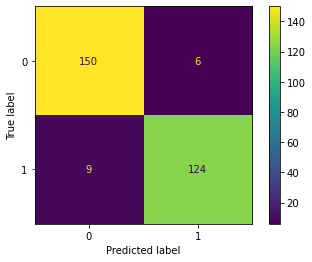

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)



<u> Observations : </u> 
- 6 Normal patients are wrongly and 124 are correctly classified as  Heart Disease Patient.
- 9 Heart Disease Patients are wrongly and 150 are correctly classified as Normal.

# Feature Importance


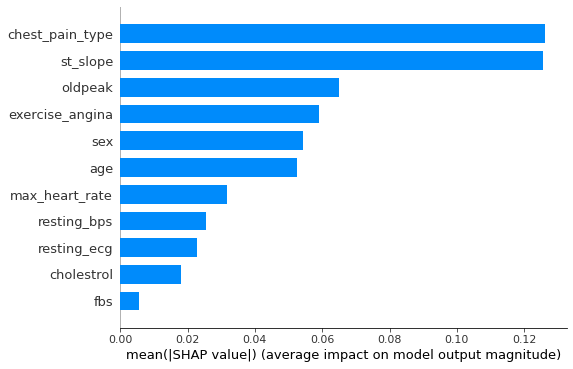

In [56]:
import shap

explainer = shap.TreeExplainer(random_forest_model)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values[1], x_test, plot_type="bar")

<u> Top 5 features are: </u><br>
- st slope
- chest pain type
- exercise induced angina
- sex
- oldpeak

In [57]:
import pickle
pickle.dump(random_forest_model, open('heart_disease_model.pkl', 'wb'))


# <u>Conclusion : </u>
- The model predicted with <b> 94 % </b> accuracy. 